In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/bengaluru_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.5,19,94,88,11,683.0,47.3378,33.13646
1,2016-01-01 01:00:00,19.5,18,92,83,10,683.0,29.4215,20.59505
2,2016-01-01 02:00:00,19.5,18,90,79,9,683.0,21.2792,14.89544
3,2016-01-01 03:00:00,19.5,18,88,74,8,683.0,25.5125,17.85875
4,2016-01-01 04:00:00,19.5,18,78,73,10,683.0,22.8478,15.99346


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.5,19,94,88,11,683.0,47.3378,33.13646
1,2016-01-01 01:00:00,19.5,18,92,83,10,683.0,29.4215,20.59505
2,2016-01-01 02:00:00,19.5,18,90,79,9,683.0,21.2792,14.89544
3,2016-01-01 03:00:00,19.5,18,88,74,8,683.0,25.5125,17.85875
4,2016-01-01 04:00:00,19.5,18,78,73,10,683.0,22.8478,15.99346


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,542.102244
std,464.500188
min,21.565670
25%,241.901765
50%,391.980050
75%,638.665178
max,2330.932170


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_2356\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


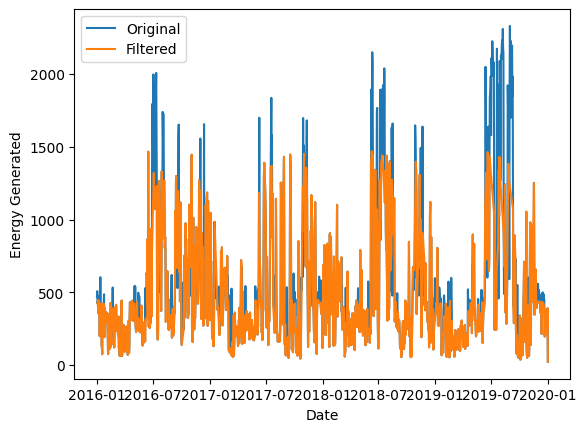

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,433.281924,23.079556,14.726222,56.147556,109.046222,11.149333,694.696000,18.668582
std,339.662812,1.820853,2.162376,21.531685,37.731959,3.954919,9.051947,17.996129
min,21.565670,19.500000,9.000000,9.000000,12.000000,0.000000,683.000000,1.250600
25%,207.530190,21.500000,13.000000,38.000000,91.000000,9.000000,686.000000,4.820500
50%,320.914650,23.000000,15.000000,57.000000,105.000000,11.000000,693.000000,14.334100
75%,442.420720,24.500000,16.000000,73.000000,118.000000,13.000000,702.000000,27.702800
max,1469.349280,27.000000,21.000000,98.000000,352.000000,24.000000,713.000000,125.260900


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

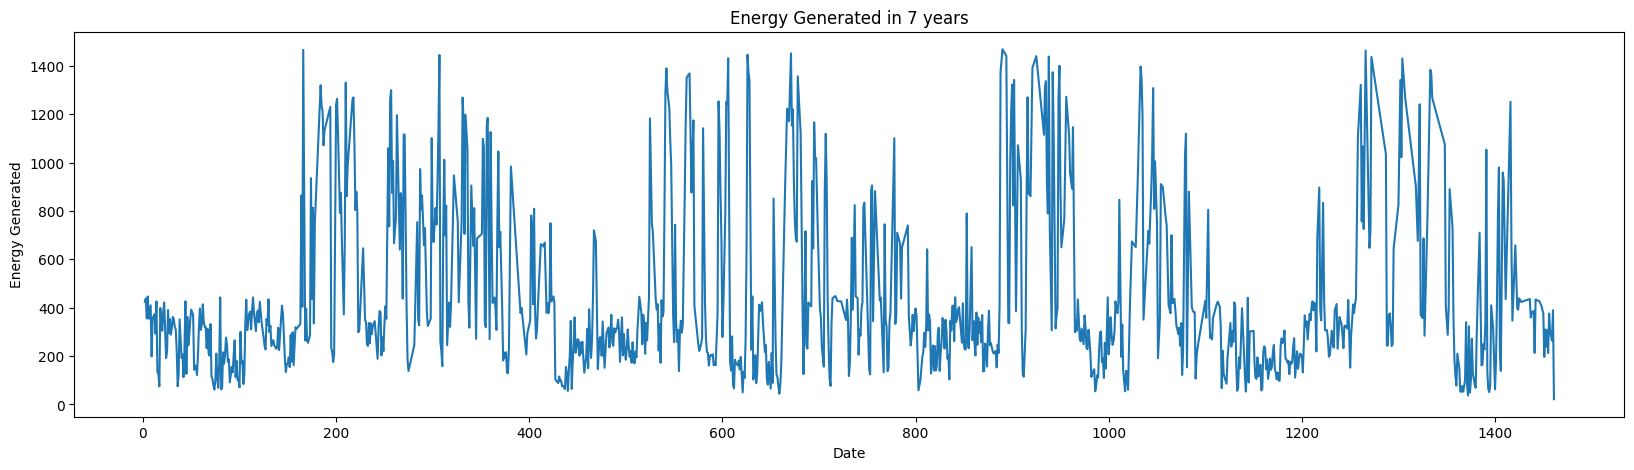

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1143,2019-02-17,147.06132,24.0,12,46,100,24,704.0,14.4933,2,48,0,1,0
1144,2019-02-18,441.13853,24.0,12,54,100,24,704.0,16.9824,2,49,0,1,0
1145,2019-02-19,91.07357,24.0,13,61,100,23,704.0,14.0893,2,50,0,1,0
1146,2019-02-20,301.22547,24.0,14,69,101,23,704.0,14.5251,2,51,0,1,0
1150,2019-02-24,304.61557,24.0,15,82,105,13,704.0,21.3596,2,55,0,1,0


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.509791416982106
p-value: 0.00018878256819532455
Critical Values: {'1%': -3.436270983129607, '5%': -2.8641544150183553, '10%': -2.5681619941180744}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
2,2016-01-03,424.66116,19.5,18,90,79,9,683.0,21.2792,1,3,0,1,0
3,2016-01-04,438.10284,19.5,18,88,74,8,683.0,25.5125,1,4,0,1,0
4,2016-01-05,355.96981,19.5,18,78,73,10,683.0,22.8478,1,5,0,1,0
5,2016-01-06,446.52202,19.5,19,69,71,12,683.0,25.7347,1,6,0,1,0
6,2016-01-07,354.36037,19.5,20,59,70,13,683.0,26.7403,1,7,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15583.394, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16308.506, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15591.356, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15832.458, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17393.791, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15577.553, Time=0.74 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15698.160, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15589.513, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15583.213, Time=0.31 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15662.260, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15570.596, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=15590.031, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=15584.048, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=15582.409, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(5,1,0))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  900
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6258.804
Date:                Thu, 29 Jun 2023   AIC                          12529.607
Time:                        13:30:09   BIC                          12558.415
Sample:                             0   HQIC                         12540.613
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3001      0.026    -11.660      0.000      -0.350      -0.250
ar.L2         -0.2547      0.027     -9.335      0.000      -0.308      -0.201
ar.L3         -0.2073      0.026     -8.051      0.000      -0.258      -0.157
ar.L4         -0.1490      0.031     -4.788      0.000      -0.210      -0.088
ar.L5         -0.1512      0.027     -5.615      0.000      -0.204      -0.098
sigma2      6.557e+04   2029.952     32.303      0.000    6.16e+04    6.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               355.55
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.27
Prob(H) (two-sided):                  0.77   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1143     98.488069
1144    131.558184
1145    165.844777
1146    163.075764
1150    151.897148
           ...    
1457    142.102739
1458    142.102739
1459    142.102739
1460    142.102739
1461    142.102739
Name: predicted_mean, Length: 225, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


40.4380712901539



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(5, 1, 0), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 53.676512079164695
Forecasted energy generation: 1143    150.656747
1144    224.068663
1145    259.712355
1146    256.488830
1150    213.620217
           ...    
1457     20.441901
1458     18.104014
1459     41.927104
1460     45.048578
1461     52.474065
Name: predicted_mean, Length: 225, dtype: float64


## Using AutoRegression Model

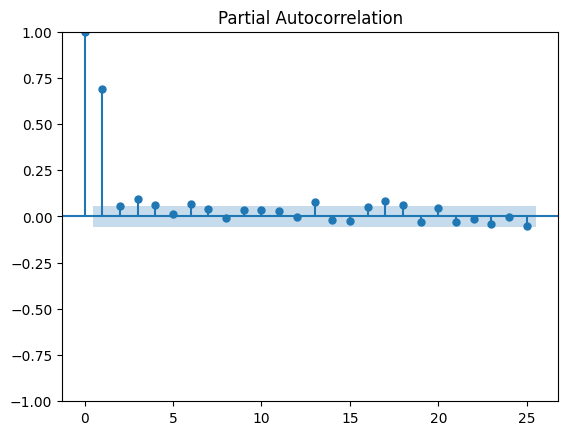

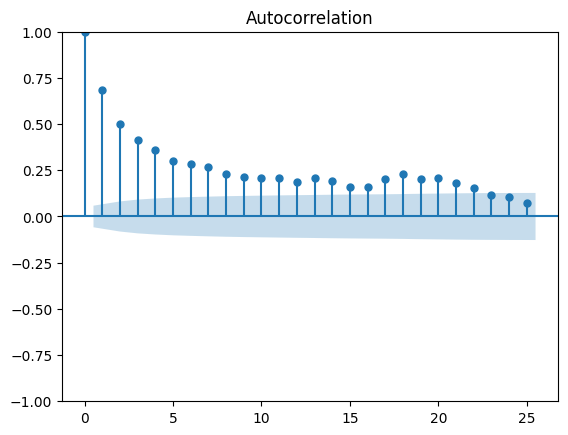

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=4).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  900
Model:                     AutoReg(4)   Log Likelihood               -6216.472
Method:               Conditional MLE   S.D. of innovations            249.407
Date:                Thu, 29 Jun 2023   AIC                          12444.943
Time:                        13:30:12   BIC                          12473.731
Sample:                             4   HQIC                         12455.942
                                  900                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                118.3008     15.695      7.537      0.000      87.538     149.063
EnergyGenerated.L1     0.6374      0.033     19.098      0.000       0.572       0.703
EnergyGenerated.L2  

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1143    180.131156
1144    248.317369
1145    288.008174
1146    314.319831
1150    339.975414
           ...    
1457    443.992854
1458    443.992854
1459    443.992854
1460    443.992854
1461    443.992854
Length: 225, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


32.54580266510173


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(2, 0, 1), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 30.459944264239255
Forecasted energy generation: 1143    228.633359
1144    336.431413
1145    402.894134
1146    441.283056
1150    420.303594
           ...    
1457    417.250461
1458    412.924997
1459    433.830897
1460    435.158680
1461    441.911856
Name: predicted_mean, Length: 225, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,471.68107
1,2016-01-02,507.86141
2,2016-01-03,424.66116
3,2016-01-04,438.10284
4,2016-01-05,355.96981


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:30:18 - cmdstanpy - INFO - Chain [1] start processing
13:30:18 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1310,2020-04-02,448.902514,-126.629203,590.049862,448.838482,448.960763,-222.256939,-222.256939,-222.256939,9.537194,9.537194,9.537194,-231.794132,-231.794132,-231.794132,0.0,0.0,0.0,226.645575
1311,2020-04-03,448.883804,-179.499449,527.389744,448.819534,448.942133,-261.974929,-261.974929,-261.974929,-31.253236,-31.253236,-31.253236,-230.721693,-230.721693,-230.721693,0.0,0.0,0.0,186.908875
1312,2020-04-04,448.865093,-159.016939,565.631315,448.800587,448.923502,-267.147777,-267.147777,-267.147777,-37.211315,-37.211315,-37.211315,-229.936462,-229.936462,-229.936462,0.0,0.0,0.0,181.717317
1313,2020-04-05,448.846383,-138.836345,591.249895,448.781641,448.904872,-236.318732,-236.318732,-236.318732,-6.995357,-6.995357,-6.995357,-229.323375,-229.323375,-229.323375,0.0,0.0,0.0,212.527651
1314,2020-04-06,448.827673,-145.679867,627.380651,448.762694,448.886242,-214.225555,-214.225555,-214.225555,14.528558,14.528558,14.528558,-228.754114,-228.754114,-228.754114,0.0,0.0,0.0,234.602118


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1310,2020-04-02,226.645575,-126.629203,590.049862
1311,2020-04-03,186.908875,-179.499449,527.389744
1312,2020-04-04,181.717317,-159.016939,565.631315
1313,2020-04-05,212.527651,-138.836345,591.249895
1314,2020-04-06,234.602118,-145.679867,627.380651


In [34]:
df_prophet_test.tail()

,ds,y
1457,2019-12-28,306.77780
1458,2019-12-29,282.69493
1459,2019-12-30,264.10888
1460,2019-12-31,389.54601
1461,2020-01-01,21.56567


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-225:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

34.65675194879772


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 32.54580266510173
Root Mean Square error for ARIMA : 40.4380712901539
Root Mean Square error for SARIMA : 30.459944264239255
Root Mean Square error for ARIMA with features : 53.676512079164695
Root Mean Square error for Prophet : 34.65675194879772
